In [1]:
# Importação de módulos, especificação e leitura do arquivo de dados
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Caminho do arquivo FITS
file_fits = r"C:\Users\Cliente\Documents\TCC NATALI\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Extrai as imagens do HDU[0] e imprime o shape
images = hdulist[0].data
print(f"Shape das imagens: {images.shape}")

# Salve todas as imagens, de ambos os filtros, na variável X
X = images
print(X.shape)
#np.save("X.npy", X)
# valor esperado: (15426, 2, 75, 75)

# N é o número de imagens originais nos dados
N = len(X)

#Extrai os Y (classificação em merger (True) ou não-merger (False)) do HDU[1] e imprime o shape
Y = hdulist[1].data
print(f"Shape dos Y: {Y.shape}")
# valor esperado: (15426,)

# Salva o array Y em um arquivo .npy
Y = np.array(Y)
#print(Y.shape)
#np.save("Y.npy", Y)
#valor esperado: (15426, )

hdulist.close()

Shape das imagens: (15426, 2, 75, 75)
(15426, 2, 75, 75)
Shape dos Y: (15426,)


Desenhando imagens com índices:
[ 7270   860  5390 13418  5191 11964 11284  5734  6265   466 13526  4426
  5578 14423 11636 11363]


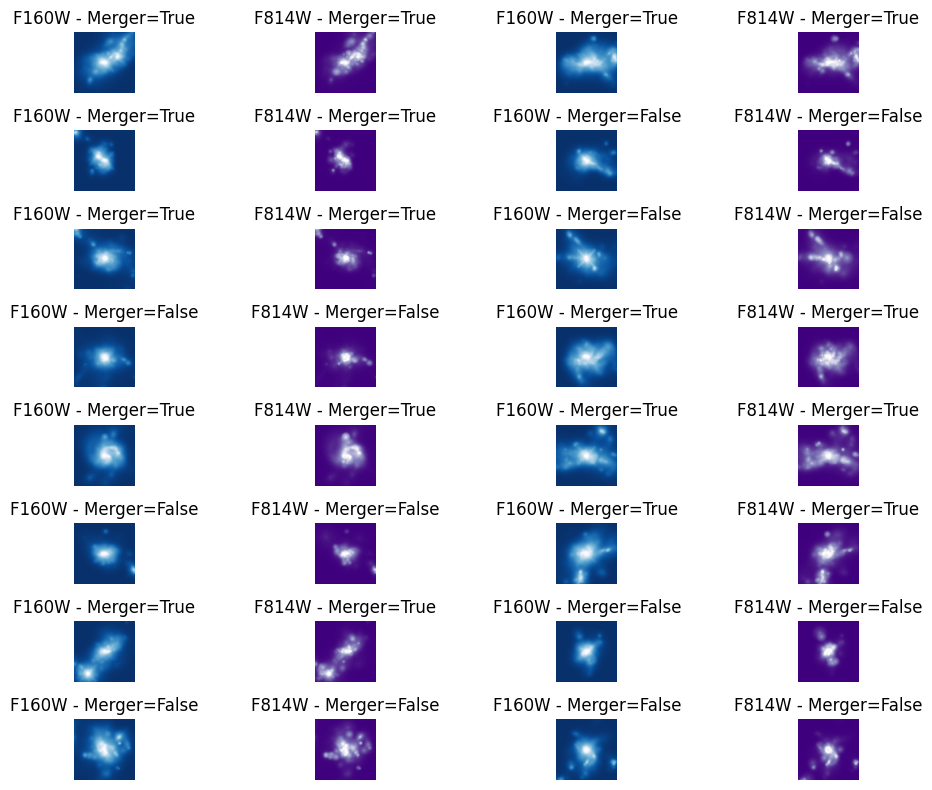

In [2]:
# Definir a seed para garantir a mesma seleção de imagens
np.random.seed(42)

# Selecionar 16 imagens aleatórias
#example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
example_ids = np.random.choice(len(X), 16)
print("Desenhando imagens com índices:")
print(example_ids)

## F160W é um filtro transparente no intervalo de ~ 1400 nm a 1700 nm (FIR)
## F814W é um filtro transparente no intervalo de ~ 700 nm a 960 nm   (NIR)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
#examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
#examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]
examples_f160w = [X[j, 1, :, :] for j in example_ids]
examples_f814w = [X[j, 0, :, :] for j in example_ids]


# Inicializar a figura
fig = plt.figure(figsize=(11, 8))  # Ajuste a altura para separar as imagens

# Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
for i, (image_f160w, image_f814w) in enumerate(zip(examples_f160w, examples_f814w)):
    # F160W
    ax1 = fig.add_subplot(8, 4, i * 2 + 1)  # Ajuste o layout para 8 linhas e 4 colunas
    norm1 = simple_norm(image_f160w, 'log', max_percent=99.75)
    #ax1.imshow(image_f160w, aspect='equal', cmap='binary_r', norm=norm1)
    ax1.imshow(image_f160w, aspect='equal', cmap='Blues_r', norm=norm1)
    #ax1.set_title('F160W - Merger=' + str(bool(hdulist[1].data[example_ids[i]][0])))
    ax1.set_title('F160W - Merger=' + str(bool(Y[example_ids[i]])))
    ax1.axis('off')

    # F814W
    ax2 = fig.add_subplot(8, 4, i * 2 + 2)  # Ajuste o layout para 8 linhas e 4 colunas
    norm2 = simple_norm(image_f814w, 'log', max_percent=99.75)
    #ax2.imshow(image_f814w, aspect='equal', cmap='binary_r', norm=norm2)
    ax2.imshow(image_f814w, aspect='equal', cmap='Purples_r', norm=norm2)
    ax2.set_title('F814W - Merger=' + str(bool(Y[example_ids[i]])))
    ax2.axis('off')

plt.tight_layout()
plt.show()

#hdulist.close()

In [3]:
try:
  list_of_mergers = np.where(Y == 1.)[0]
  list_of_nonmergers = np.where(Y == 0.)[0]
except:
  data_hdu1_vec = np.array([y[0] for y in Y])
  list_of_mergers = np.where(data_hdu1_vec == 1.)[0]
  list_of_nonmergers = np.where(data_hdu1_vec == 0.)[0]

del data_hdu1_vec

# Imprimir os 5 primeiros elementos de cada lista e seus shapes
print("Primeiros 5 elementos de list_of_mergers:")
print(list_of_mergers[:5])
print("Últimos 5 elementos de list_of_mergers:")
print(list_of_mergers[-5:])
print(f"Shape de list_of_mergers: {list_of_mergers.shape}")

print("\nPrimeiros 5 elementos de list_of_nonmergers:")
print(list_of_nonmergers[:5])
print("Últimos 5 elementos de list_of_nonmergers:")
print(list_of_nonmergers[-5:])
print(f"Shape de list_of_nonmergers: {list_of_nonmergers.shape}")

Primeiros 5 elementos de list_of_mergers:
[0 1 2 3 4]
Últimos 5 elementos de list_of_mergers:
[8115 8116 8117 8118 8119]
Shape de list_of_mergers: (8120,)

Primeiros 5 elementos de list_of_nonmergers:
[8120 8121 8122 8123 8124]
Últimos 5 elementos de list_of_nonmergers:
[15421 15422 15423 15424 15425]
Shape de list_of_nonmergers: (7306,)


Após transposição: (400, 75, 75, 2)
Após normalização: 1.0


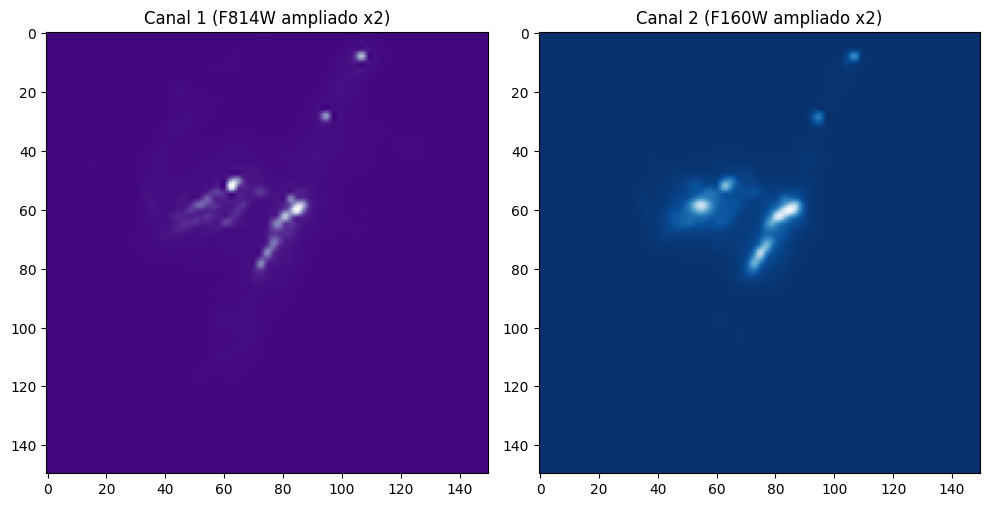

In [5]:
# Carrega os dados do arquivo
#X = np.load("X.npy")

# Transpõe os dados para o formato esperado pelo ImageDataGenerator (channels last)
# shape(X) passa de (15426, 2, 75, 75) para (15426, 75, 75, 2)
X = X.transpose(0, 2, 3, 1)
print("Após transposição:", X.shape)

# Converte os dados para o tipo float32
#X = X.astype(np.float32)
#print("Após conversão para float32:", X.shape)

# Normaliza os dados para o intervalo [0, 1]
for i in range(N):
    X[i] = X[i] / np.max(X[i])
print("Após normalização:", np.max(X)) # saída esperada: 1.0

# Salva os dados processados em um novo arquivo
#np.save("X_processed.npy", X)

#%% Aumenta a resolução de uma imagem

#import numpy as np
#import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import random

# Carregar os dados da imagem
#imagem = np.load("X_processed.npy")

#imagem = X

random.seed(1)
# Selecionar um índice aleatório de imagem
indice_aleatorio = random.randint(0, X.shape[0] - 1)

# Selecionar a imagem com o índice aleatório
imagem_selecionada = X[indice_aleatorio]

# Separar os canais
canal1 = imagem_selecionada[:, :, 0]
canal2 = imagem_selecionada[:, :, 1]

# Aumentar a resolução por um fator de 2 (ajuste este valor conforme necessário)
fator_ampliacao = 2
#canal1_ampliado = zoom(canal1, fator_ampliacao, order=1)
#canal2_ampliado = zoom(canal2, fator_ampliacao, order=1)
canal1_ampliado = zoom(canal1, fator_ampliacao)
canal2_ampliado = zoom(canal2, fator_ampliacao)

# Criar uma figura com duas subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Exibir os canais como imagens nas subplots
#axs[0].imshow(canal1_ampliado, cmap='gray')  # Exibir canal 1 em escala de cinza
axs[0].imshow(canal1_ampliado, cmap='Purples_r')  # Exibir canal 1 
axs[0].set_title(f"Canal 1 (F814W ampliado x{fator_ampliacao})")

#axs[1].imshow(canal2_ampliado, cmap='gray')  # Exibir canal 2 em escala de cinza
axs[1].imshow(canal2_ampliado, cmap='Blues_r')  # Exibir canal 2 
axs[1].set_title(f"Canal 2 (F160W ampliado x{fator_ampliacao})")

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()

In [30]:
# Corrige os dados Y
#Y = [y[0] for y in Y]  # Extrai os valores das tuplas
#Y = np.array(Y)        # Converte para um array NumPy normal
Y_int = Y.astype(int)      # Converte para inteiro e salva como Y_int.npy

# Salva os dados corrigidos
#np.save("Y_int.npy", Y_int)  # Salva o array Y corrigido

#print("Y_int.shape:", Y_int.shape)
#print("Primeiros 2 elementos:", Y_int[:2])
#print("Últimos 2 elementos:", Y_int[-2:])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import ndimage
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm

# Define the augmentation factor
fator_de_aumento = 2

# Define o fator de aumento de brilho
fator_brilho = 10  # Ajuste este valor para aumentar o brilho

# Data Augmentation Generator
def augment_image_generator(file_path, Y_int, fator_de_aumento, fator_brilho, batch_size=32):
    """Generates augmented image batches from a file.

    Args:
        file_path: The path to the .npy file containing the images.
        Y_int: The corresponding labels (numpy array).
        fator_de_aumento: The factor by which to increase the number of images.
        fator_brilho: Fator para aumentar o brilho dos pixels
        batch_size: The number of images to process in each batch.

    Yields:
        Tuple: A batch of augmented images (X) and corresponding labels (Y).
    """
    
    # Open the file in read mode (ensure that 'rb' is used for binary files)
    with open(file_path, 'rb') as f:
        # Read the shape of the data
        shape = np.frombuffer(f.read(8), dtype=np.int64)
        total_images = shape[0]
        
        # Iterate through the data in batches
        for i in tqdm(range(0, total_images, batch_size), desc="Loading Images"):
            # Calculate the bytes to read for the current batch
            bytes_to_read = batch_size * np.prod(shape[1:]) * 4 # 4 bytes per float32

            # Read the data for the batch
            batch_data = np.frombuffer(f.read(bytes_to_read), dtype=np.float32).reshape((batch_size, *shape[1:])) 
            batch_Y = Y_int[i:i + batch_size]

            # Augment images in the batch
            augmented_batch_X = []
            augmented_batch_Y = []
            for k, (image, label) in enumerate(zip(batch_data, batch_Y)):
                # Duplicate original image, adding a third channel
                image_rgb = np.stack((image[..., 0], image[..., 1], image[..., 0]), axis=-1)
                augmented_batch_X.append(image_rgb) 
                augmented_batch_Y.append(label)

                # Generate additional augmented images (if desired)
                for _ in range(fator_de_aumento):
                    angle = random.uniform(-30, 30)
                    image_augmented = ndimage.rotate(image, angle, reshape=False)
                    if random.random() < 0.5:
                        image_augmented = image_augmented[:, ::-1, :]  # Horizontal flip
                    if random.random() < 0.5:
                        image_augmented = image_augmented[::-1, :, :]  # Vertical flip

                    # Create a third channel by replicating the first channel 
                    image_augmented_rgb = np.stack((image_augmented[..., 0], image_augmented[..., 1], image_augmented[..., 0]), axis=-1)

                    # Normalize each image separately (Simple normalization for data already in [0, 1])
                    image_augmented_rgb = image_augmented_rgb / np.max(image_augmented_rgb)  

                    # Add augmented image and label
                    augmented_batch_X.append(image_augmented_rgb) 
                    augmented_batch_Y.append(label)

            # Convert batches to numpy arrays
            augmented_batch_X = np.array(augmented_batch_X)
            augmented_batch_Y = np.array(augmented_batch_Y)

            # Yield the augmented batch
            yield augmented_batch_X, augmented_batch_Y

# Augment training data using the generator
batch_size = 32
image_gen = augment_image_generator("X_processed.npy", Y_int, fator_de_aumento, fator_brilho, batch_size=batch_size)

# Split augmented data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_original, Y_int, test_size=0.2, random_state=42)

# Display some augmented images (optional)
num_images_to_display = 5
fig, axes = plt.subplots(num_images_to_display, 1, figsize=(8, num_images_to_display * 2), constrained_layout=True)
for i in range(num_images_to_display):
    image = X_train[i]  # Note: Using X_train from original dataset for display
    label = Y_train[i] 

    # Criar uma imagem RGB:
    image_rgb = np.stack((image[..., 0], image[..., 1], image[..., 0]), axis=-1) 

    axes[i].imshow(image_rgb, interpolation='bicubic')
    axes[i].set_title(f"Imagem {i+1}")
    axes[i].axis('off')
    if label == 1:
        axes[i].set_xlabel("Merge", fontsize=10)
    else:
        axes[i].set_xlabel("Non-Merge", fontsize=10)
plt.show()

MemoryError: Unable to allocate 530. MiB for an array with shape (12340, 75, 75, 2) and data type float32

In [ ]:
#import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Carrega os dados
#X = np.load("X_aumentado.npy")
#Y = np.load("Y_aumentado.npy")

# Define as proporções dos conjuntos
train_ratio = 0.8       # 80% para treino
validation_ratio = 0.1  # 10% para validação
test_ratio = 0.2        # 20% para teste

# Cria um objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)

# # Itera sobre as divisões
# for train_index, test_index in sss.split(X, Y):
#     # Separa os dados em treino e teste
#     X_train, X_test = X[train_index], X[test_index]
#     Y_train, Y_test = Y[train_index], Y[test_index]


# # Itera sobre as divisões com dados aumentados
for train_index, test_index in sss.split(X_aumentado, Y_aumentado):
    # Separa os dados em treino e teste
    X_train, X_test = X_aumentado[train_index], X_aumentado[test_index]
    Y_train, Y_test = Y_aumentado[train_index], Y_aumentado[test_index]


# Divide o conjunto de treino em treino e validação
# sss_train = StratifiedShuffleSplit(n_splits=1, test_size=validation_ratio / (train_ratio + validation_ratio), random_state=42)
# for train_index, validation_index in sss_train.split(X_train, Y_train):
#     # Separa os dados em treino e validação
#     X_train, X_validation = X_train[train_index], X_train[validation_index]
#     Y_train, Y_validation = Y_train[train_index], Y_train[validation_index]

# Salva os dados em arquivos .npy
# np.save("X_train.npy", X_train)
# np.save("Y_train.npy", Y_train)
# np.save("X_validation.npy", X_validation)
# np.save("Y_validation.npy", Y_validation)
# np.save("X_test.npy", X_test)
# np.save("Y_test.npy", Y_test)

# Imprime o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento:", X_train.shape[0])
#print("Tamanho do conjunto de validação:", X_validation.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

In [ ]:
#import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import elu
#import numpy as np
import json
#import matplotlib.pyplot as plt
#import random

# Importe o módulo layers
from tensorflow.keras import layers

# Define a camada de entrada (com 2 canais)
input_shape = (75, 75, 2)
input_tensor = layers.Input(shape=input_shape)

# Camadas convolucionais
x = layers.Conv2D(8, (5, 5), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

x = layers.Conv2D(16, (3, 3), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camadas densas
x = layers.Flatten()(x)
x = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout
x = layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camada de saída
output_tensor = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Parâmetros de compilação
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Aumento da taxa de aprendizado
metrics = ['accuracy']
loss = 'binary_crossentropy'
# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Caminho para salvar checkpoints
checkpoint_filepath = 'melhor_modelo_pesos.weights.keras'

# Callbacks
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    #monitor='val_accuracy',
    monitor='accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

early_stopping = EarlyStopping(
    #monitor='val_loss',
    monitor='loss',
    mode='min',
    verbose=1,
    patience=80, # Aumento do patience
    restore_best_weights=True
)

# Combine callbacks into a list:
callbacks = [checkpoint, early_stopping]

# Carrega os dados dos arquivos .npy
# X_train = np.load("X_train.npy")
# Y_train = np.load("Y_train.npy")
# X_validation = np.load("X_validation.npy")
# Y_validation = np.load("Y_validation.npy")
# X_test = np.load("X_test.npy")
# Y_test = np.load("Y_test.npy")

# Defina as variáveis:
nb_train = X_train.shape[0]
#nb_valid = X_validation.shape[0]
nb_test = X_test.shape[0]
nb_epoch = 100
nb_classes = 2
batch_size = 64
shuffle = True

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

#%%% Treinamento da NN
# Treinar o modelo
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    #validation_data=(X_validation, Y_validation),
    shuffle=shuffle,
    verbose=1,
    callbacks=callbacks
)

# # Salvar histórico, pesos e modelo
# with open("history.json", "w") as f:
#     json.dump(history.history, f)

# model.save_weights("pesos_modelo.weights.h5")
# model.save("modelo.keras")

# # Carregar modelo salvo
# loaded_model = tf.keras.models.load_model("modelo.keras")

# Imprimir a acurácia do modelo carregado
#accuracy = loaded_model.evaluate(X_test, Y_test, verbose=0)[1]
#print(f"Acurácia do modelo carregado: {accuracy * 100:.2f}%")
accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Acurácia do modelo carregado: {accuracy * 100:.2f}%")


#%%% Gráficos do histórico de treinamento
# Plotar histórico
# with open("history.json", "r") as f:
#     history_data = json.load(f)

# loss = history_data['loss']
# val_loss = history_data['val_loss']
# acc = history_data['accuracy']
# val_acc = history_data['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))
figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)

#plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
#plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
#plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
#plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")

#plots = plot1_loss + plot1_val_loss + plot1_lacc + plot1_val_lacc
plots = plot1_loss+plot1_lacc
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History (Pristine Images)")
plt.tight_layout()
axis1.legend(loc='center right')

plt.show()

In [ ]:
#import json
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, brier_score_loss
#import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Carregar histórico
# with open("history.json", "r") as f:
#     history_data = json.load(f)

history_data = history
# predict
#prob = loaded_model.predict(X_test)
prob = model.predict(X_test)
pred =  (prob > 0.5).astype('int32')

# measure confusion
labels=[0, 1]
cm = confusion_matrix(Y_test, pred[:,0], labels=labels)  # Use Y_test aqui
cm = cm.astype('float')
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("cm", cm)
print("\n cm_norm", cm_norm)

fpr, tpr, thresholds = roc_curve(Y_test, prob, pos_label=1)  # Use Y_test aqui
auc = roc_auc_score(Y_test, prob)
print("\n AUC:", auc)

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('\n Confusion matrix (Pristine Images)', y=1.08)
fig.colorbar(cax)

# Defina as posições dos ticks
ax.set_xticks([0, 1])  # Define as posições dos ticks no eixo x
ax.set_yticks([0, 1])  # Define as posições dos ticks no eixo y

# Agora defina as labels dos ticks
ax.set_xticklabels(labels)  # Remove o elemento vazio da lista
ax.set_yticklabels(labels)  # Remove o elemento vazio da lista

plt.xlabel('Predicted')
plt.ylabel('True')
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm_norm[i, j] < thresh else "black")
plt.show()

In [ ]:
# ROC TEST SET
figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, pred[:,0])  # Access the first column
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, pred[:,0])  # Access the first column
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred[:,0])  # Access the first column
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, pred[:,0])  # Access the first column
print('F1 score: %f' % f1)

# brier score
bs = brier_score_loss(Y_test, prob)
print('Brier score: %f' % bs)


In [ ]:
import time
from tqdm import tqdm
import numpy as np

# Create a sample NumPy array
Y_test = np.array([1, 0, 1, 1, 0])

# Save the array to a file
np.save("Y_test.npy", Y_test)

# Later, load the array back from the file
loaded_Y_test = np.load("Y_test.npy")

# **You need to define `pred` here**
# Assuming `pred` is a 2D array
pred = np.array([[0, 1], [1, 0], [1, 1], [0, 0], [1, 0]])

# Calculate the total number of examples
total_examples = len(Y_test)

# Initialize a counter for the progress bar
progress = 0

# Loop through each example with progress bar
for i in tqdm(range(len(Y_test)), desc="Searching for matches"):
    # Check for specific combinations (TP, FP, TN, FN)
    if (Y_test[i] == 1 and pred[i, 0] == 1):
        # Update progress counter
        progress += 1

# Print the number of matches found
print(f"Found {progress} matches.")

#print output probabilities for the chosen TP, FP, TN, FN examples
print(prob[84],prob[1370],prob[2031],prob[3003]) # TP examples
print(prob[560],prob[1228],prob[2878],prob[3026]) # FP examples
print(prob[564],prob[1056],prob[2083],prob[3063]) # TN examples
print(prob[465],prob[1546],prob[2241],prob[3037]) # FN examples

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ... (código anterior para carregar dados, etc.)

# plot examples
tp1 = X_test[84]  # Acessa toda a imagem do exemplo 84
tp2 = X_test[1370]
tp3 = X_test[2031]
tp4 = X_test[3003]

fp1 = X_test[560]
fp2 = X_test[1228]
fp3 = X_test[2878]
fp4 = X_test[3026]

tn1 = X_test[564]
tn2 = X_test[1056]
tn3 = X_test[2083]
tn4 = X_test[3063]

fn1 = X_test[465]
fn2 = X_test[1546]
fn3 = X_test[2241]
fn4 = X_test[3037]

examples = [tp1, tp2, tp3, tp4, fp1, fp2, fp3, fp4, tn1, tn2, tn3, tn4, fn1, fn2, fn3, fn4]

# Aplica a normalização logarítmica
examples = [np.log(image + 1) for image in examples]

fig1=plt.figure(figsize=(8,8))

for i, image in enumerate(examples):
    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2)
    plt.imshow(combined_image, aspect='auto', cmap='viridis', norm=LogNorm())
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm

fig1 = plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura

for i, image in enumerate(examples):
    # Define os rótulos
    labels = ['TP', 'FP', 'TN', 'FN']
    label = labels[i % len(labels)]

    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")

    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2)

    # Ajuste de Contraste:
    norm = PowerNorm(gamma=0.5)

    # Plota a imagem
    img = plt.imshow(combined_image, aspect='auto', cmap='inferno', norm=norm)
    plt.title(label, fontsize=12)  # Adiciona o rótulo

    # Adiciona uma barra de cores
    plt.colorbar(img, fraction=0.046, pad=0.04)

# Ajusta o espaçamento entre as subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Adiciona a explicação da escala na parte inferior da figura
plt.figtext(
    0.5, 0.01, "Escala de Cores: Intensidade dos Pixels", ha="center", va="bottom", fontsize=10
)

plt.show()